**Лабораторная работа №8. Рекуррентные нейронные сети для анализа временных рядов**


**Данные:** Набор данных для прогнозирования временных рядов, который состоит из среднемесячного числа пятен на солнце, наблюдаемых с января 1749 по август 2017. Данные в виде csv-файла можно скачать на сайте Kaggle -> https://www.kaggle.com/robervalt/sunspots/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [33]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 95kB/s 
     |████████████████████████████████| 3.2MB 42.3MB/s 
     |████████████████████████████████| 491kB 50.2MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

**Задание 1.**
Загрузите данные. Изобразите ряд в виде графика. Вычислите основные характеристики временного ряда (сезонность, тренд, автокорреляцию).


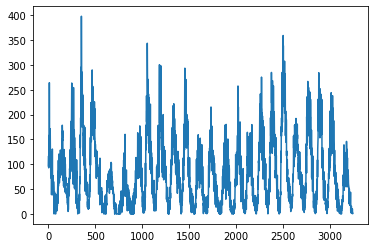

In [11]:
dataframe = pandas.read_csv('/content/drive/My Drive/Collab Data/Sunspots.csv', usecols=[2], engine='python', skipfooter=3)
plt.plot(dataframe)
plt.show()

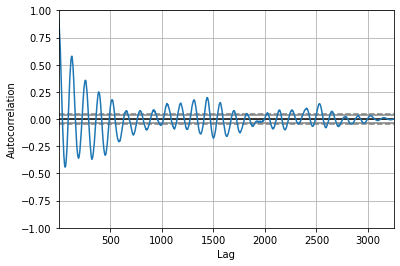

In [12]:
autocorrelation_plot(dataframe)

**Задание 2.**
Для прогнозирования разделите временной ряд на обучающую, валидационную и контрольную выборки.



In [13]:
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(len(dataset))

train_size = int(len(dataset) * 0.7)
validation_size = int(len(dataset) * 0.2)
test_size = len(dataset) - train_size - validation_size
train, validation, test = dataset[0:train_size,:], dataset[train_size:train_size+validation_size,:], dataset[train_size+validation_size:len(dataset),:]
print(len(train), len(validation), len(test))

3249
2274 649 326


In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
trainX, trainY = create_dataset(train)
validationX, validationY = create_dataset(validation)
testX, testY = create_dataset(test)

In [0]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
validationX = numpy.reshape(validationX, (validationX.shape[0], 1, validationX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

**Задание 3.**
Примените модель ARIMA для прогнозирования значений данного временного ряда.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2273
Model:                 ARIMA(5, 1, 0)   Log Likelihood                3045.325
Method:                       css-mle   S.D. of innovations              0.063
Date:                Mon, 06 Apr 2020   AIC                          -6076.650
Time:                        19:10:39   BIC                          -6036.548
Sample:                             1   HQIC                         -6062.021
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.617e-05      0.001      0.124      0.902      -0.001       0.001
ar.L1.D.y     -0.4350      0.021    -20.801      0.000      -0.476      -0.394
ar.L2.D.y     -0.3022      0.023    -13.327      0.0

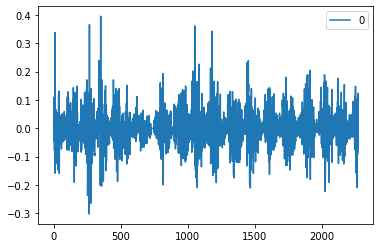

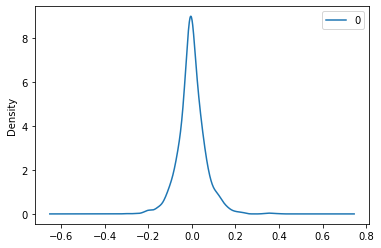

                 0
count  2273.000000
mean      0.000016
std       0.063384
min      -0.302310
25%      -0.032105
50%      -0.002130
75%       0.031582
max       0.395665


In [19]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = pandas.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [29]:
from sklearn.metrics import mean_squared_error
 
X = dataframe.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=99.593578, expected=114.100000
predicted=111.438596, expected=105.200000
predicted=105.534552, expected=112.100000
predicted=107.246697, expected=75.300000
predicted=88.500018, expected=139.200000
predicted=119.917690, expected=122.400000
predicted=118.089734, expected=142.400000
predicted=128.630236, expected=134.300000
predicted=130.644754, expected=128.300000
predicted=125.985576, expected=152.400000
predicted=144.315743, expected=163.400000
predicted=151.895354, expected=139.600000
predicted=142.860535, expected=149.600000
predicted=147.696833, expected=102.300000
predicted=122.111836, expected=83.900000
predicted=106.352766, expected=98.300000
predicted=108.618970, expected=114.800000
predicted=112.110896, expected=104.700000
predicted=106.974992, expected=83.800000
predicted=92.200249, expected=87.900000
predicted=91.557245, expected=97.000000
predicted=96.210522, expected=119.900000
predicted=109.465673, expected=117.100000
predicted=110.480770, expected=109.600000
pre

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=8.031503, expected=27.900000
predicted=21.055181, expected=13.800000
predicted=15.214242, expected=22.400000
predicted=19.440413, expected=16.100000
predicted=17.091360, expected=0.600000
predicted=6.968211, expected=18.100000
predicted=16.640897, expected=9.900000
predicted=11.265243, expected=5.100000
predicted=7.976296, expected=40.100000
predicted=27.775757, expected=15.400000
predicted=15.900535, expected=5.800000
predicted=11.045989, expected=9.800000
predicted=12.453516, expected=3.400000
predicted=7.110084, expected=17.400000
predicted=15.233755, expected=46.000000
predicted=31.450598, expected=39.100000
predicted=31.049565, expected=18.800000
predicted=22.356769, expected=38.200000
predicted=33.588651, expected=47.900000
predicted=41.065311, expected=42.200000
predicted=40.350034, expected=63.400000
predicted=53.588196, expected=48.800000
predicted=47.373611, expected=29.100000
predicted=37.266164, expected=70.500000
predicted=60.218910, expected=45.400000
predicted=

Test MSE: 623.160


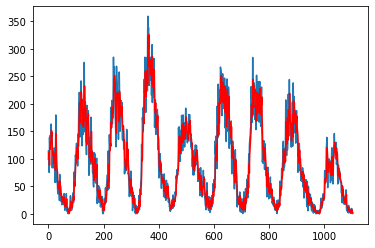

In [30]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

**Задание 4.**
Повторите эксперимент по прогнозированию, реализовав рекуррентную нейронную сеть (с как минимум 2 рекуррентными слоями).


**Задание 5.**
Сравните качество прогноза моделей.
Какой максимальный результат удалось получить на контрольной выборке?

In [8]:
batch_size = 1
look_back = 1

model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))


model.summary()

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2, validation_data=(validationX, validationY))




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 1, 4)                 96        
_________________________________________________________________
lstm_2 (LSTM)                (1, 4)                    144       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2272 samples, validate on 647 samples
Epoch 1/50
 - 6s - loss: 0.0231 - val_loss: 0.0196
Epoch 2/50
 - 5s - loss: 0.0188 - val_loss: 0.0155
Epoch 3/50
 - 5s - loss: 0.0164 - val_loss: 0.0079
Epoch 4/50
 - 5s - loss: 0.0157 - val_loss: 0.0148
Epoch 5/50
 - 5s - loss: 0.0142 - v

In [18]:
testPredict = model.predict(testX, batch_size=batch_size)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 22.43 RMSE
